### Voting method 

Voting in ML is an **ensemble learning** method where multiple models vote to make a final prediction. There are two types:  

1️⃣ **Hard Voting** 🗳️ → Majority rule (most common prediction wins)  
2️⃣ **Soft Voting** 🎛️ → Average of predicted probabilities (higher probability wins)  

Used in **classification problems** to improve accuracy! 🚀


How **Voting Classifier** works:  

1️⃣ **Train Different Models** 🏋️‍♂️  
   - Train multiple ML models (e.g., Logistic Regression, SVM, Random Forest) on the same dataset.  

2️⃣ **Voting Process** 🗳️  
   - **Hard Voting** → Each model gives a prediction, and the majority wins.  
   - **Soft Voting** → Each model gives probability scores, and the average decides the final prediction.  

3️⃣ **Final Prediction** 🎯  
   - The chosen label (hard) or highest probability (soft) is the final output.  

It **boosts accuracy** by combining different models! 🚀

In [2]:
import warnings
import pandas as pd 
import numpy as np 

# models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 

# model selection 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 

# voting 
from sklearn.ensemble import VotingClassifier 

# metric 
from sklearn.metrics import accuracy_score, confusion_matrix

# visualization 
import matplotlib.pyplot as plt 
import seaborn as sns

warnings.filterwarnings('ignore')


In [3]:
# import preprocessed dataset 
df = pd.read_csv('./preprocessedData/cleanData.csv')

In [4]:
df.isna().sum()

CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
target              0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Urban_Yes           0
US_Yes              0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
independent = df.drop(columns = 'target')

dependent = df[['target']]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size = 0.3, stratify = dependent, random_state = 42)

**Params**

In [8]:
rf_params = {
    "n_estimators": [50, 100, 200, 500],  
    "max_depth": [10, 20, 30], 
    "min_samples_split": [10, 20, 30],  
    "min_samples_leaf": [10, 20, 30], 
    "bootstrap": [True, False] 
}

dt_params = {
    "criterion": ["gini", "entropy"], 
    "max_depth": [10, 20, 30],  
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 2, 4]  
}

lg_params = {
    "penalty": ["l1", "l2", "elasticnet"],  
    "C": [0.1, 1, 10, 100], 
    "solver": ["liblinear", "lbfgs", "saga"] 
}

knn_params = {
    "n_neighbors": [3, 5, 7, 9],  
    "weights": ["uniform", "distance"],  
    "metric": ["euclidean", "manhattan", "minkowski"] 
}

**models**

In [9]:
rf_model = RandomForestClassifier()

dt_model = DecisionTreeClassifier()

lg_model = LogisticRegression()

knn_model = KNeighborsClassifier()

In [10]:
modelsPreforms = [
    ("Random Forest", rf_params, rf_model),
    ("Decision Tree", dt_params, dt_model),
    ("Logistic Regression", lg_params, lg_model),
    ("K-Neighbors", knn_params, knn_model),
]

**Training**

In [11]:
models = []

for modelAsset in modelsPreforms:   
    model = GridSearchCV(estimator = modelAsset[2], param_grid = modelAsset[1], cv = 5, n_jobs = -1)
    model.fit(x_train, y_train)
    models.append((modelAsset[0], model.best_estimator_))

In [12]:
# test accuracy 
for model in models:
    pred = model[1].predict(x_test)
    acc = accuracy_score(y_true = y_test, y_pred = pred)
    print(model[0], " : ", acc)

Random Forest  :  0.8416666666666667
Decision Tree  :  0.725
Logistic Regression  :  0.8916666666666667
K-Neighbors  :  0.6


In [13]:
# train accuracy 
for model in models:
    pred = model[1].predict(x_train)
    acc = accuracy_score(y_true = y_train, y_pred = pred)
    print(model[0], " : ", acc)

Random Forest  :  0.8857142857142857
Decision Tree  :  0.9214285714285714
Logistic Regression  :  0.8821428571428571
K-Neighbors  :  0.8107142857142857


**Voting Method**

In [14]:
# estimators

estimators = [('rf', models[0][1]), ('dt', models[1][1]), ('lg', models[2][1]), ('knn', models[3][1])] 

`Hard Voting`

In [15]:
ensemble_H = VotingClassifier(estimators = estimators, voting = 'hard')

In [16]:
ensemble_H.fit(x_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=30,
                                                     min_samples_leaf=10,
                                                     min_samples_split=20,
                                                     n_estimators=500)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=30,
                                                     min_samples_leaf=4,
                                                     min_samples_split=10)),
                             ('lg',
                              LogisticRegression(C=100, solver='liblinear')),
                             ('knn',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=3))])

In [17]:
# Test accuracy 

predTest = ensemble_H.predict(x_test)
accuracy_score(y_test, predTest)

0.8833333333333333

In [18]:
# Train accuracy

predTrain = ensemble_H.predict(x_train)
accuracy_score(y_train, predTrain) 

0.9178571428571428

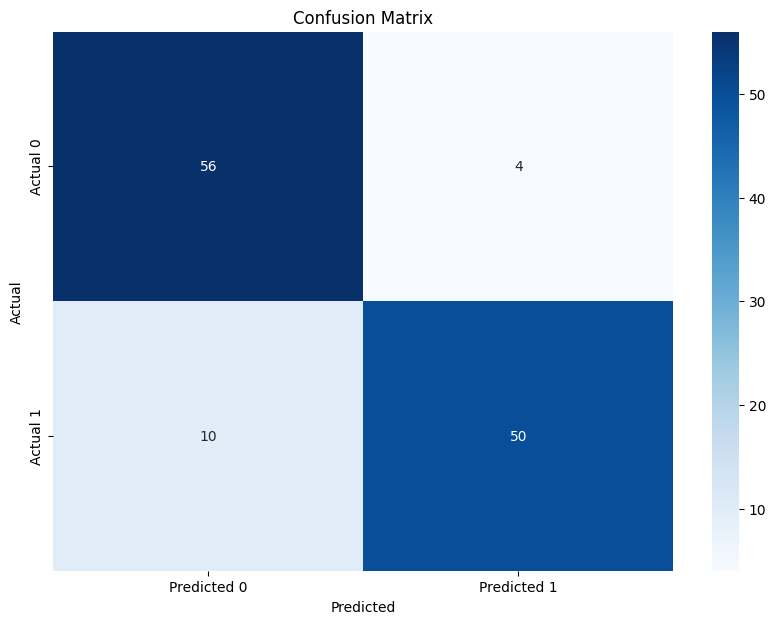

In [19]:
# Compute the confusion matrix for test
cm = confusion_matrix(y_pred=predTest, y_true=y_test)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

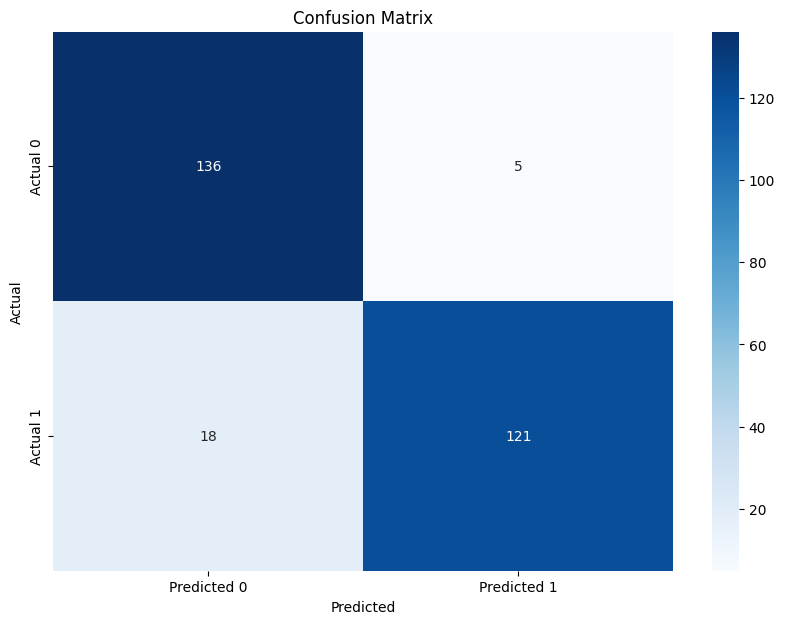

In [20]:
# Compute the confusion matrix for train
cm = confusion_matrix(y_pred=predTrain, y_true=y_train)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()